Decision Tree Classification

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Purchase_new.csv')


In [ ]:
df.head()

,Holiday,Discount,Free Delivery,Purchase
0,No,Yes,Yes,Yes
1,No,Yes,Yes,Yes
2,No,No,No,No
3,yes,Yes,Yes,Yes
4,yes,Yes,Yes,Yes


In [ ]:
input  =df.drop('Purchase',axis='columns')
output =df['Purchase']


In [ ]:
output.head()

0    Yes
1    Yes
2     No
3    Yes
4    Yes
Name: Purchase, dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb_Holiday = LabelEncoder()
lb_Discount = LabelEncoder()
lb_Free_Delivery = LabelEncoder()
lb_Purchase = LabelEncoder()

In [ ]:
input['Holiday_n']= lb_Holiday.fit_transform(input['Holiday'])
input['Discount_n']= lb_Discount.fit_transform(input['Discount'])
input['Free_Delivery_n']= lb_Free_Delivery.fit_transform(input['Free Delivery'])
output_n = lb_Purchase.fit_transform(output)


In [ ]:
output_n

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1])

In [ ]:
input_n = input.drop(['Holiday','Discount','Free Delivery'],axis='columns')
input_n.head()

,Holiday_n,Discount_n,Free_Delivery_n
0,0,1,1
1,0,1,1
2,0,0,0
3,1,1,1
4,1,1,1


In [ ]:
from sklearn import tree


In [ ]:
model = tree.DecisionTreeClassifier()

In [ ]:
model.fit(input_n,output_n)

DecisionTreeClassifier()

In [ ]:
model.score(input_n,output_n)

0.9333333333333333

In [ ]:
model.predict([[0,1,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

Titanic survival (
Post Pruning)

In [ ]:
df = pd.read_csv('/content/titanic.csv')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Lname,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Braund,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,Cumings,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,Heikkinen,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,Futrelle,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,Allen,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
input=df[['Sex', 'Age', 'Fare']]

In [ ]:
lb_sex= LabelEncoder()
input['sex_n'] = lb_sex.fit_transform(input['Sex'])

<ipython-input-35-8c532e1186b7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  input['sex_n'] = lb_sex.fit_transform(input['Sex'])


In [ ]:
X = input.drop('Sex',axis ='columns')

In [ ]:
X

,Age,Fare,sex_n
0,22.0,7.2500,1
1,38.0,71.2833,0
2,26.0,7.9250,0
3,35.0,53.1000,0
4,35.0,8.0500,1
...,...,...,...
151,22.0,66.6000,0
152,55.5,8.0500,1
153,40.5,14.5000,1
154,NaN,7.3125,1


In [ ]:
y= df['Survived']

In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
X.isnull().sum()

Age      30
Fare      0
sex_n     0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer instance with the mean strategy
imputer = SimpleImputer(strategy='mean')

# Fit and transform the imputer on the 'Age' column
X['Age'] = imputer.fit_transform(X[['Age']])

In [ ]:
 from sklearn.model_selection import train_test_split
 X_train, X_test, y_train, y_test = train_test_split(  X, y, test_size=0.30, random_state=0)

In [ ]:
model2 = tree.DecisionTreeClassifier()

In [ ]:
model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
model2.score(X_test,y_test)

0.7446808510638298

In [ ]:
model2.predict([[51,61.3792,1]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

[Text(0.46, 0.9545454545454546, 'x[2] <= 0.5\ngini = 0.478\nsamples = 109\nvalue = [66, 43]'),
 Text(0.24, 0.8636363636363636, 'x[1] <= 22.0\ngini = 0.326\nsamples = 39\nvalue = [8, 31]'),
 Text(0.2, 0.7727272727272727, 'x[1] <= 17.25\ngini = 0.444\nsamples = 24\nvalue = [8, 16]'),
 Text(0.16, 0.6818181818181818, 'x[0] <= 20.5\ngini = 0.363\nsamples = 21\nvalue = [5, 16]'),
 Text(0.08, 0.5909090909090909, 'x[1] <= 7.89\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.04, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.12, 0.5, 'x[0] <= 18.5\ngini = 0.444\nsamples = 6\nvalue = [2, 4]'),
 Text(0.08, 0.4090909090909091, 'x[1] <= 12.85\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.04, 0.3181818181818182, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.12, 0.3181818181818182, 'x[0] <= 10.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.08, 0.22727272727272727, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.16, 0.22727272727272727, 'gini = 0.0\nsamples = 1\n

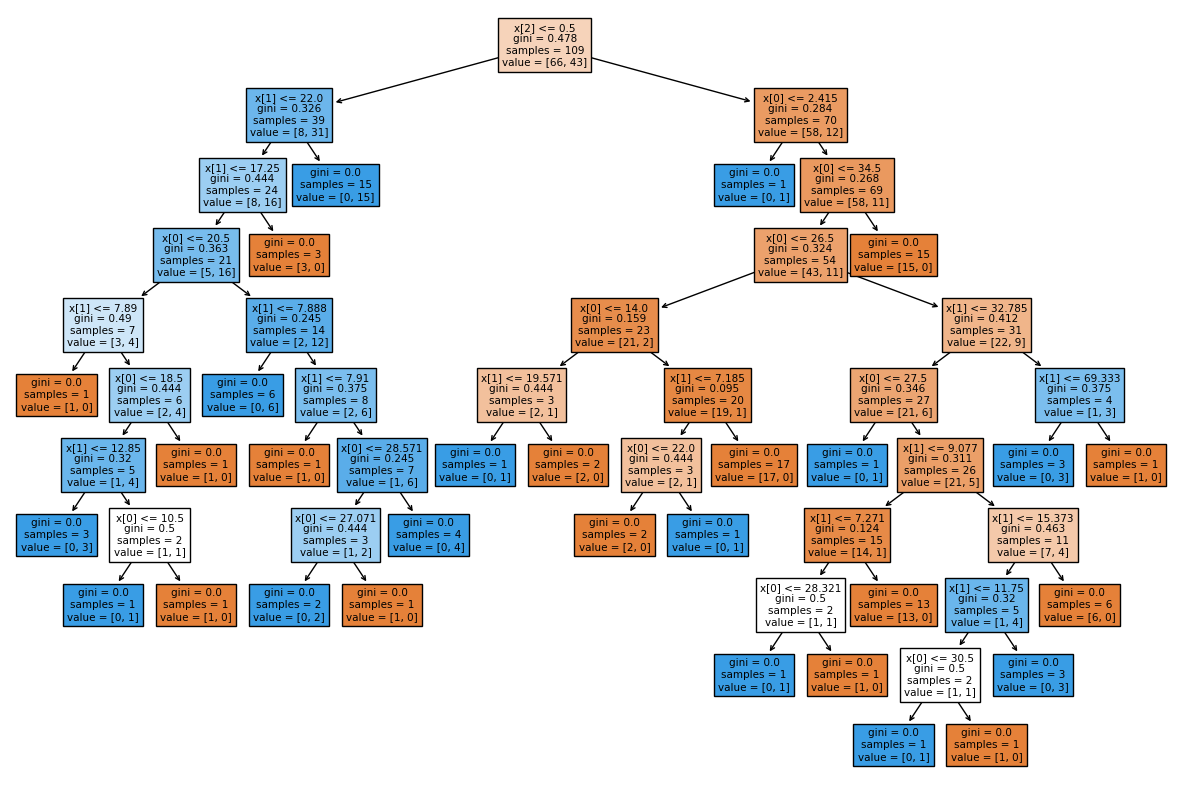

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree (model2, filled=True)

Pre Pruning in Decision tree

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn.datasets import load_iris

In [ ]:
iris=load_iris()

In [ ]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
import seaborn as sns
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
X=df.iloc[:,:-1]
y=iris.target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
treemodel=DecisionTreeClassifier(max_depth=2)

In [ ]:
treemodel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=2)

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\ngini = 0.666\nsamples = 100\nvalue = [31, 35, 34]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 69\nvalue = [0, 35, 34]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.188\nsamples = 38\nvalue = [0, 34, 4]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.062\nsamples = 31\nvalue = [0, 1, 30]')]

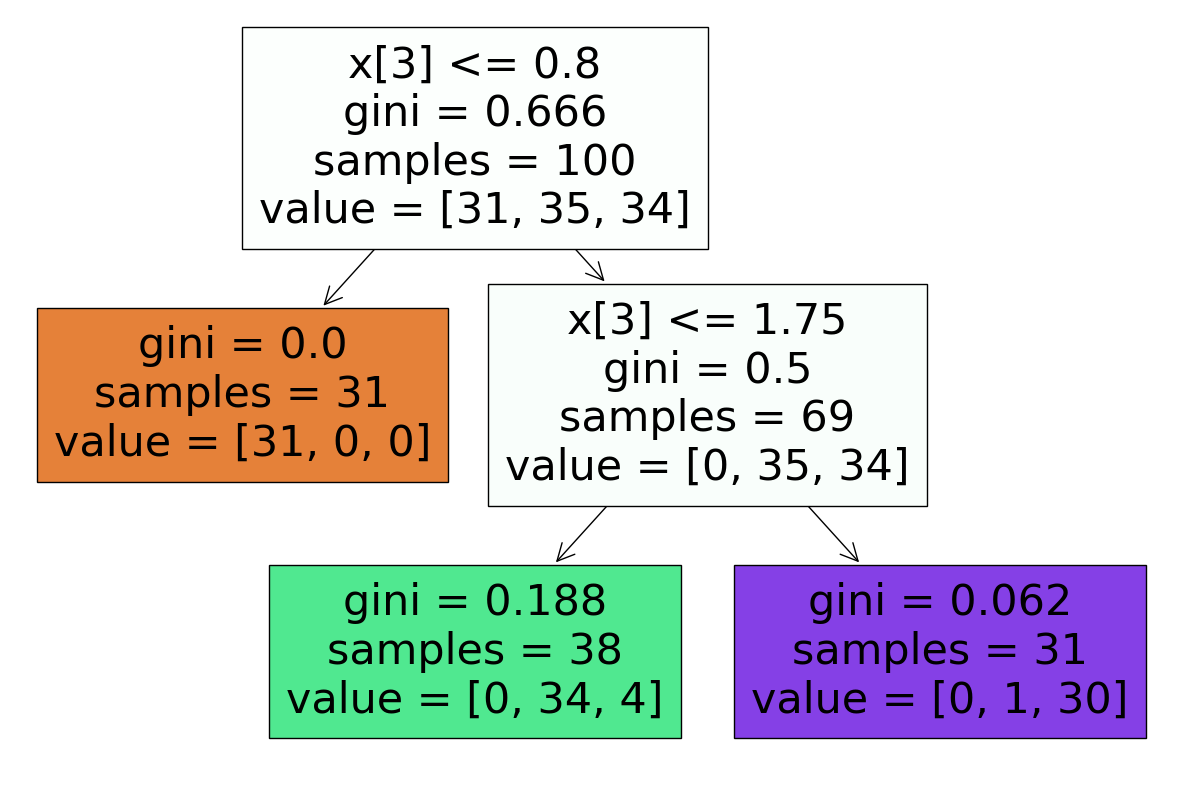

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(treemodel,filled=True)

In [ ]:
y_pred=treemodel.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
score=accuracy_score(y_pred,y_test)
print(score)

0.98


In [ ]:
## Preprunning
parameter={
 'criterion':['gini','entropy','log_loss'],
  'splitter':['best','random'],
  'max_depth':[1,2,3,4,5],
  'max_features':['auto', 'sqrt', 'log2']

}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
treemodel=DecisionTreeClassifier()
cv=GridSearchCV(treemodel,param_grid=parameter,cv=5,scoring='accuracy')

In [ ]:
cv.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/usr/local/lib/pytho

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
cv.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [ ]:
y_pred=cv.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
score=accuracy_score(y_pred,y_test)

In [ ]:
score


0.98

Decision Tree Regression

In [ ]:
df = pd.read_csv('/content/insurance.csv')
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [ ]:
df['sex'] =df[ 'sex'].astype('category')
df['sex'] = df['sex'].cat.codes

df['smoker'] =df ['smoker'].astype('category')
df ['smoker'] = df['smoker'].cat.codes

df['region'] =df[ 'region'].astype('category')
df['region'] = df['region'].cat.codes

In [ ]:
df

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1,10600.55
1334,18,0,31.9,0,0,0,2205.98
1335,18,0,36.9,0,0,2,1629.83
1336,21,0,25.8,0,0,3,2007.95


In [ ]:
X = df.drop(columns = 'expenses')
X

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1
...,...,...,...,...,...,...
1333,50,1,31.0,3,0,1
1334,18,0,31.9,0,0,0
1335,18,0,36.9,0,0,2
1336,21,0,25.8,0,0,3


In [ ]:
y = df['expenses']
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)